# UCI Concrete Slump Test Data
https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test
#### Author: Kunehi Parekh

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer 
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from graphviz import Source

In [2]:
#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data')
df.head(n=2)

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14


### Exploratory Analysis

In [3]:
#check shape of dataframe
df.shape

(103, 11)

In [4]:
#drop unnecessary column
df = df.drop('No', 1)

In [5]:
#check types of variables
df.dtypes

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

In [6]:
#check for nulls
df.isnull().sum().sort_values(ascending=False)

Compressive Strength (28-day)(Mpa)    0
FLOW(cm)                              0
SLUMP(cm)                             0
Fine Aggr.                            0
Coarse Aggr.                          0
SP                                    0
Water                                 0
Fly ash                               0
Slag                                  0
Cement                                0
dtype: int64

In [7]:
#check descriptives
df.describe().round(2)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00
mean,229.89,77.97,149.01,197.17,8.54,883.98,739.60,18.05,49.61,36.04
std,78.88,60.46,85.42,20.21,2.81,88.39,63.34,8.75,17.57,7.84
min,137.00,0.00,0.00,160.00,4.40,708.00,640.60,0.00,20.00,17.19
25%,152.00,0.05,115.50,180.00,6.00,819.50,684.50,14.50,38.50,30.90
50%,248.00,100.00,164.00,196.00,8.00,879.00,742.70,21.50,54.00,35.52
75%,303.90,125.00,235.95,209.50,10.00,952.80,788.00,24.00,63.75,41.20
max,374.00,193.00,260.00,240.00,19.00,1049.90,902.00,29.00,78.00,58.53


Cement                                   AxesSubplot(0.125,0.536818;0.133621x0.343182)
Slag                                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly ash                                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water                                 AxesSubplot(0.606034,0.536818;0.133621x0.343182)
SP                                    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Coarse Aggr.                                AxesSubplot(0.125,0.125;0.133621x0.343182)
Fine Aggr.                               AxesSubplot(0.285345,0.125;0.133621x0.343182)
SLUMP(cm)                                 AxesSubplot(0.44569,0.125;0.133621x0.343182)
FLOW(cm)                                 AxesSubplot(0.606034,0.125;0.133621x0.343182)
Compressive Strength (28-day)(Mpa)       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

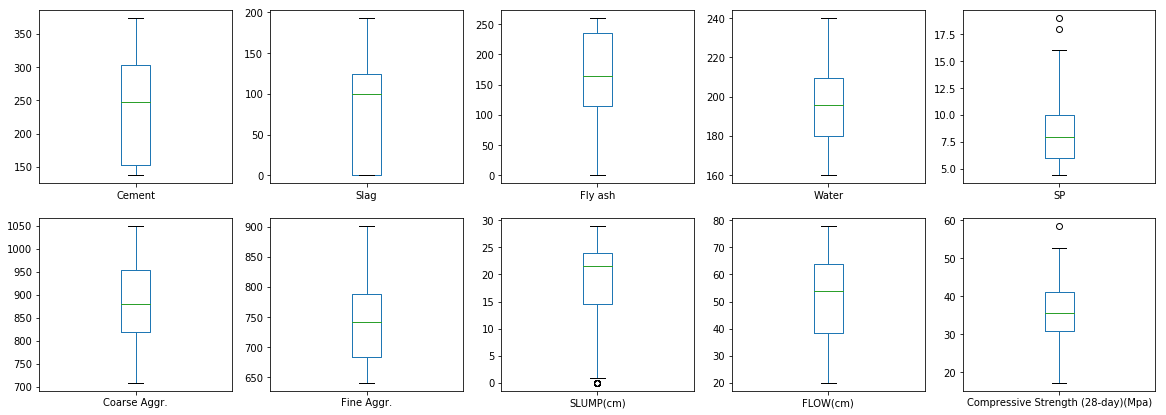

In [8]:
#check for outliers using boxplots
df.plot(kind='box', subplots=True, figsize=(20,7), layout=(2, 5))

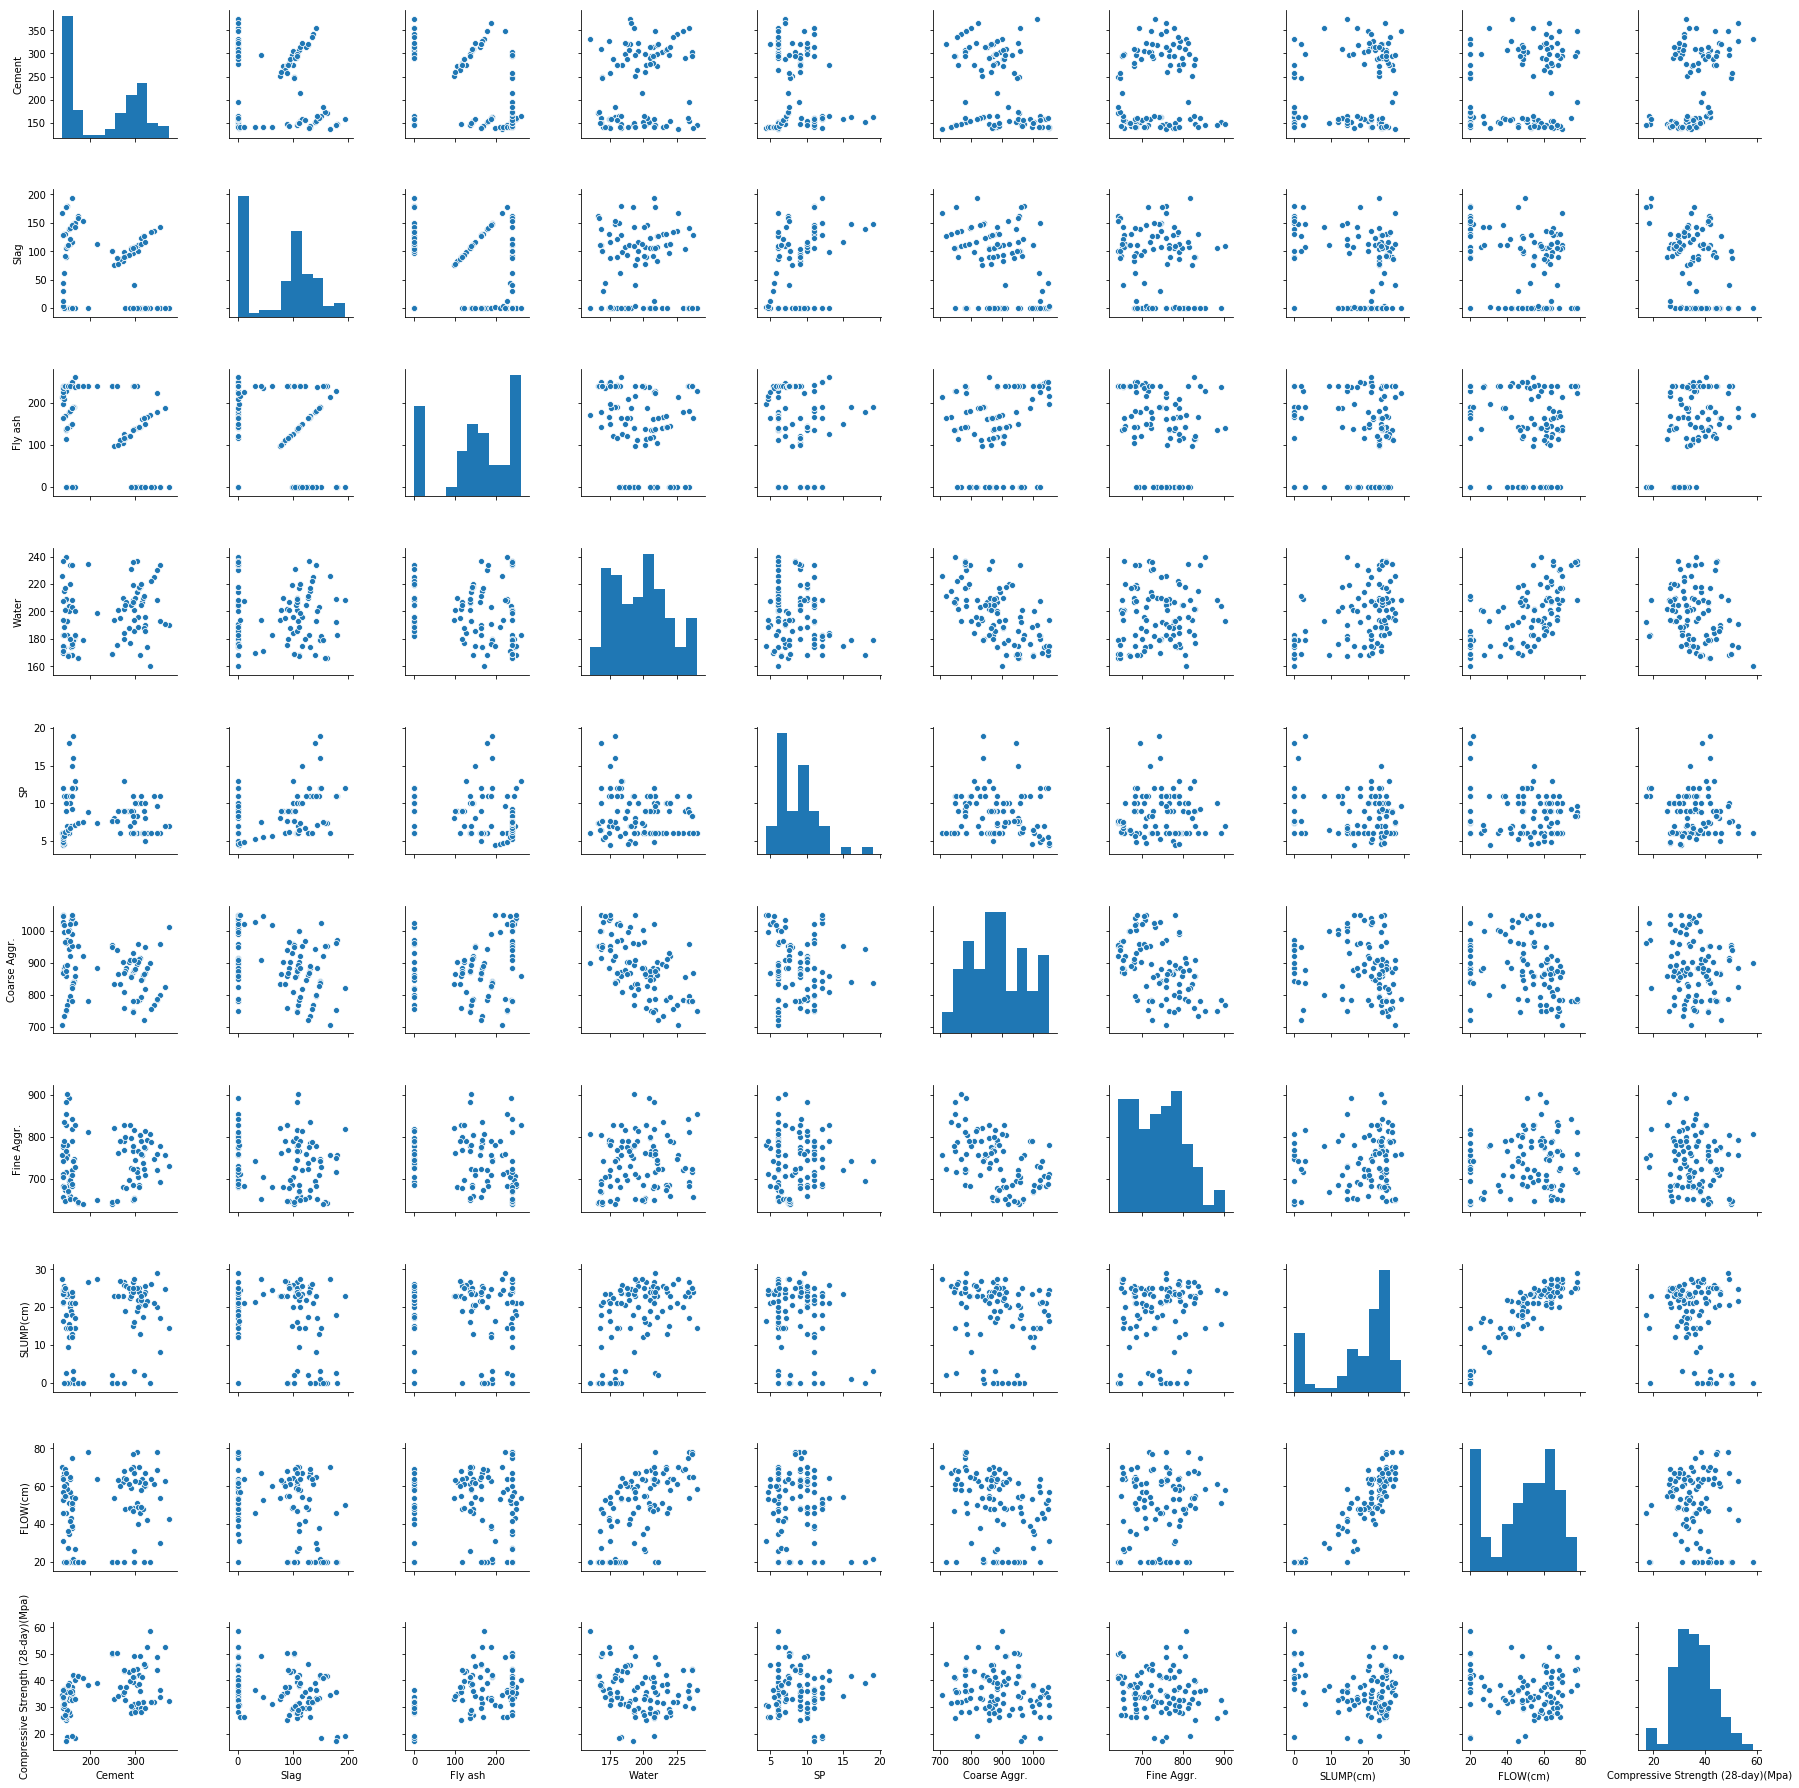

In [9]:
#check univariate and bivariate distributions using histograms and scatterplots
sns.pairplot(df)

Explain your exploratory analysis process and what you observed about the
data.
* The exploratory analysis process includes checking for data size and type, missing values, outliers, and distributions of columns interested in analyzing. This dataset has a small sample size of 103 records. There are no missing fields and all the variables are continuous. From the descriptives we can see that there are some fields with high standard deviation and outliers which may require feature transformations.

Explain the visual representations you generated and what they reveal about the
data structure.
* The boxplots reveal how the values are spread out and if there are outliers. From the boxplots above, we can see that SP, SLUMP and CS have a few stragglers that might be influential. Additionally, the univariate and bivariate distribution plots help identify trends for follow-up analysis. The univariate distributions show skewness in most of the fields. Slag in particular has a lot of zero values. Skewed fields may require normalization through a feature transformation (i.e. log, sqrt). The bivariate plots reveal a negative relationship between Water and Coarse Aggregate and strong positive relationships between Water and FLOW and SLUMP and FLOW. 

Explain how findings from the exploratory analysis might influence additional
analyses.
* Findings from the exploratory analysis can help with feature transformations and feature engineering to increase predictive power.

### Correlations 

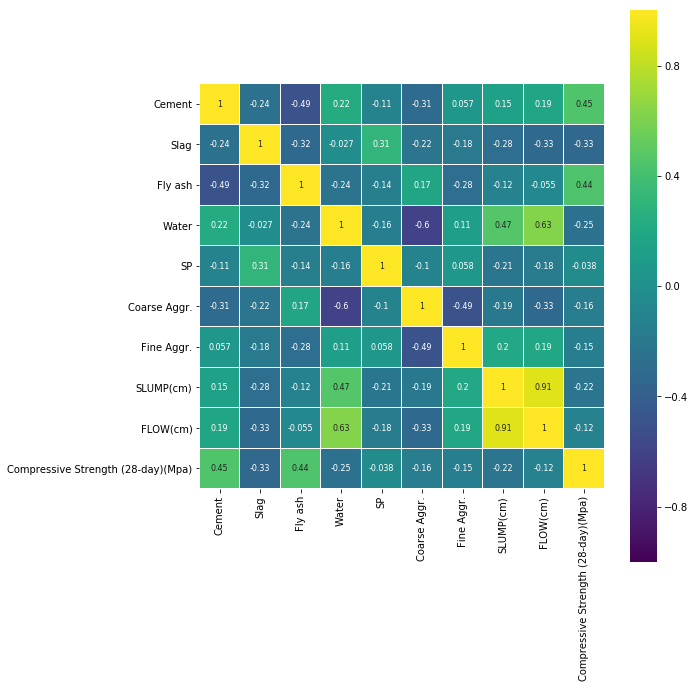

In [10]:
#create a correlation matrix
corr = df.corr()  
plt.figure(figsize=(10, 10))
sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
plt.show()

Select one of the correlations you demonstrate and explain, what the correlation
says of the sample data.
* Multicollinearity (intercorrelations) does not seem to be a problem among the predictors as the correlations between them are mostly moderate. The strongest correlation between then is between Water and Coarse Aggregator of -0.6. There do not appear to be very strong correlations between CS and any of the predictors.

Which inputs are most predictive of CS? How did you know which inputs are most predictive of
CS?
* Based on the strength of the correlation coefficients, the most predictive predictors of CS seem to be Cement and Fly ash. 

In [23]:
#Separate target from the training features
X = df.drop(['SLUMP(cm)', 'FLOW(cm)', 'Compressive Strength (28-day)(Mpa)'], 1)
y = df['Compressive Strength (28-day)(Mpa)']

In [24]:
#Split data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
shapes = [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
shapes

[(72, 7), (31, 7), (72L,), (31L,)]

### Decision Tree

In [30]:
#train a decision tree regressor
selected_columns = ['Cement', 'Fly ash']
X_train_dt = X_train[selected_columns]
X_test_dt =  X_test[selected_columns]
dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train_dt, y_train)
y_pred_dtr = dtr.predict(X_test_dt)
print('Accuracy of Decision tree regressor on test set: {:.2f}'.format(dtr.score(X_test_dt, y_test)))
print('RMSE of Decision tree regressor on test set: {:.2f}'.format(sqrt(mean_squared_error(y_test, y_pred_dtc))))

Accuracy of Decision tree regressor on test set: 0.66
RMSE of Decision tree regressor on test set: 4.91


In [38]:
#grid-search to find best parameters
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
depths = np.arange(1, 21)
param_grid = [{'max_depth':depths}]
gs_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring=rmse_scorer, cv=10)
gs_dtr = gs_dtr.fit(X_train_dt, y_train)
print(gs_dtr.best_params_)

{'max_depth': 4}


In [37]:
#fit a model using best parameter
dtr_2 = gs_dtr.best_estimator_
dtr_2.fit(X_train_dt, y_train)
y_predicted_dtr2 = dtr_2.predict(X_test_dt)
print('RMSE of Decision tree regressor on test set: {:.2f}'.format(sqrt(mean_squared_error(y_test, y_predicted_dtr2))))

RMSE of Decision tree regressor on test set: 4.74


In [19]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

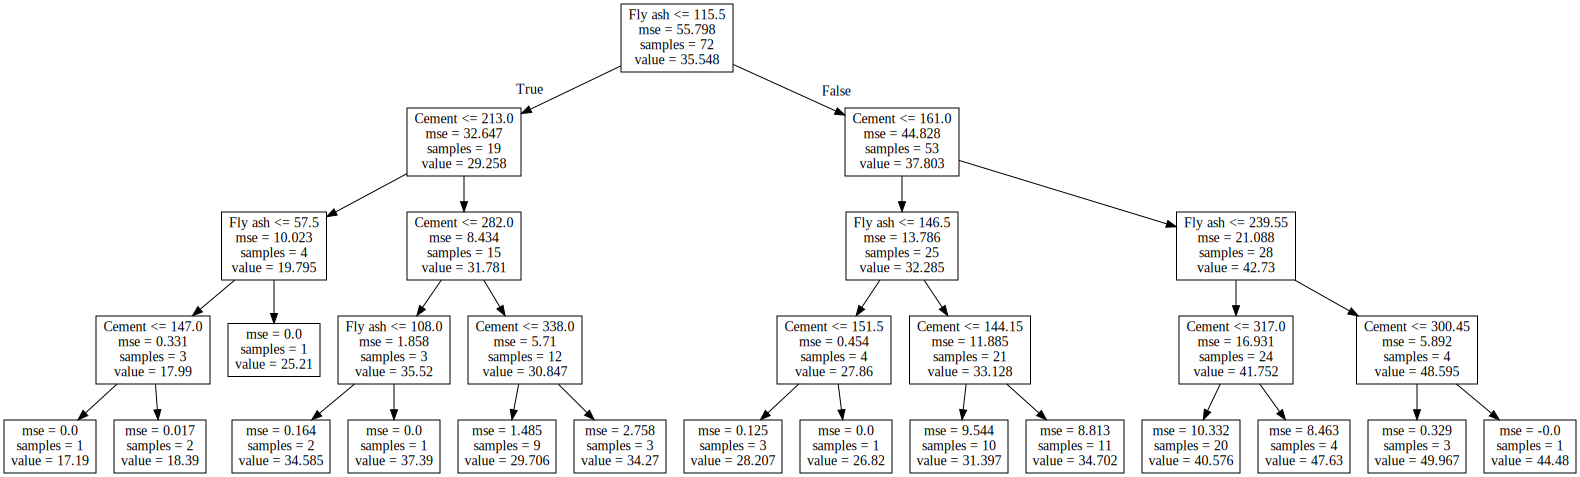

In [33]:
Source(export_graphviz(dtr_2, feature_names = ['Cement', 'Fly ash']))

Explain the visual representation you generated.
* The visual is a decision tree which splits the data multiple times according to certain cutoff values in the features. To interpret it, you start at the root node and go to the next nodes where the edges tell you which subsets you're looking at. Once  you reach the leaf node, it tells you the predicted outcome. The first split is performed using the Fly ash feature. Then the second split is performed usig the Cement feature. And ultimately based on the rules you can traverse down the tree, which in our case has a depth of 4, to get to a prediction. 

Explain what the test error signifies.
* The test signifies how the model will perform on a set of data it has previously not seem. This is a more accurate measure of how the model will perform in production.

What is the ideal depth of your tree model? How did you determine the ideal tree depth?
* The ideal depth if this tree model is 4 if we want to minimize the RMSE. If we use a depth of 4, the RMSE goes from 4.74 to 4.41. This was determined using a grid search to pick the best parameter that minimizes the RMSE.

What is the accuracy score of your model? Explain what the accuracy score
signifies.
* The accuracy is the R^2 of the prediction which in this case is 66%. The accuracy score tells us how much of the variation in CS is accounted for by the two features, Fly ash and Cement.

### Random Forest

In [34]:
#train a random forest regressor
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print('Accuracy of RF regressor on test set: {:.2f}'.format(rfr.score(X_test, y_test)))
print('RMSE of RF regressor on test set: {:.2f}'.format(sqrt(mean_squared_error(y_test, y_pred_rfr))))
names = X_train.columns.tolist()
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rfr.feature_importances_), names), 
             reverse=True)

Accuracy of RF regressor on test set: 0.83
RMSE of RF regressor on test set: 3.44
Features sorted by their score:
[(0.3762, 'Cement'), (0.3599, 'Fly ash'), (0.1207, 'Water'), (0.06, 'Slag'), (0.0356, 'SP'), (0.0304, 'Coarse Aggr.'), (0.0172, 'Fine Aggr.')]


In [39]:
#grid-search to find best parameters
param_grid_rfr = [{'n_estimators': [10, 100, 500, 1000, 1500], 'max_features': ['auto', 'sqrt', 'log2']}]
gs_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid_rfr, scoring=rmse_scorer, cv=10)
gs_rfr = gs_rfr.fit(X_train, y_train)
print(gs_rfr.best_params_)

{'max_features': 'auto', 'n_estimators': 100}


In [42]:
#fit a model using best parameter
rfr_2 = gs_rfr.best_estimator_
rfr_2.fit(X_train, y_train)
y_predicted_rfr2 = rfr_2.predict(X_test)
print('RMSE of Decision tree regressor on test set: {:.2f}'.format(sqrt(mean_squared_error(y_test, y_predicted_rfr2))))

RMSE of Decision tree regressor on test set: 3.08


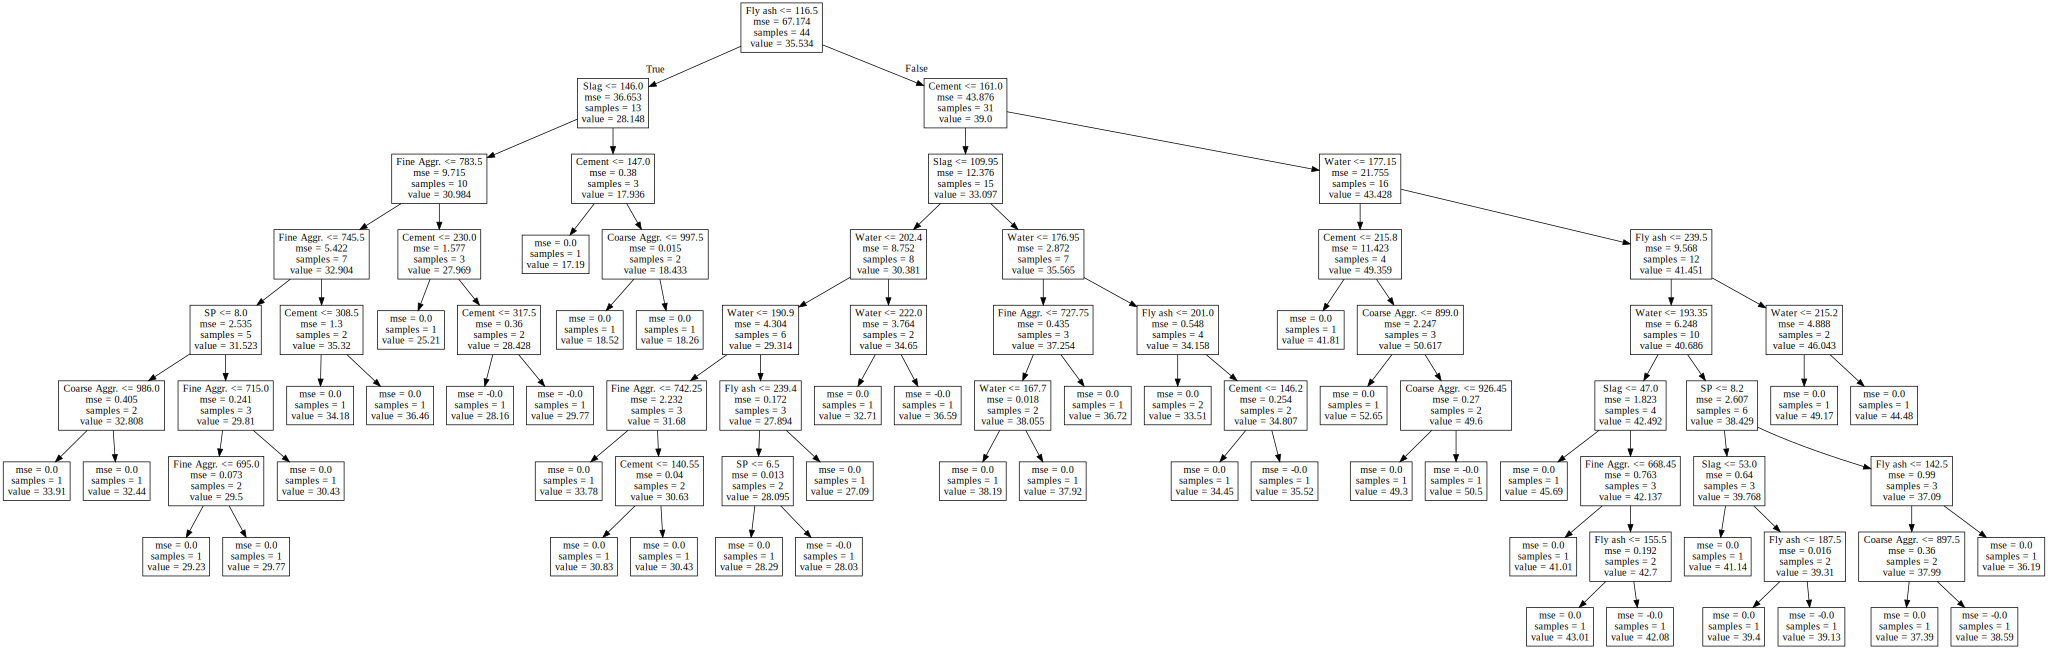

In [49]:
Source(export_graphviz(rfr_2.estimators_[0], feature_names = X_train.columns))

How many trees does your model include? How did you determine the number of trees to
include?
* The tuned model includes 100 trees. This was determined based on the grid search.

How many features does your model account for? How did you determine how many features to
account for?
* The model accounts for all the features. This was also determined using the grid search which picks the best parameters that minimizes the RMSE.

### Further Analysis

What alternative methods might you use to predict CS?
* Linear regression, SVM regression, AdaBoost regression, XGBoost regression, neuaral network

What additional data, not included in the dataset, might help better predict CS?
* Quality of materials, age of concrete, temperature, etc.

Based on the EDA you completed in the first step, what additional analyses might you complete
based on the data structure?
* Additional pre-processing could definitely enhance model performance. Some of the features could use a log transformation and trimming of the outliers. In addition, new features can also be engineered (i.e. water to cement ratio).

What applications might your analysis lead to? Describe what business value
these models could provide to a prospective client. Your response can apply to either the models included in this task or any additional
analyses proposed above.
* Compressive strength seems to be one of the most important properties of concrete. Since concrete is employed to resist compressive stresses, if engineers can predict it ahead of time, it can help them achieve their goals faster and more efficiently and plan better in terms of their resources. This could lead to huge savings in terms of time and budget.